#Notebook to conduct Data Science experiments on the Quora Questions data set using Vanilla ML Algorithms for the Springboard Capstone project

In [2]:
!pip install ipython-autotime
%load_ext autotime
# above lines get me the cell execution time.

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
#above lines help me avoid warnings thrown by sklearn


import re
import os

import unicodedata

import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

from datetime import datetime
from pytz import timezone
import time

from sklearn.model_selection import train_test_split

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')

# Load stop words
stop_words = stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')


from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('gdrive/My Drive/kaggle/quora')
!ls -ltr


  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=b18dc89d1c881d74d389b5c4ba6c942ad7a3aa386eed645068a795a8adb769bb
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Ente

In [3]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

time: 127 ms


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from datetime import datetime
from pytz import timezone
import time

from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
  #  classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


  
  
# Remove special characters before tokenization
#df['question_text']= df['question_text'].map(lambda x: re.sub(r'[^a-zA-Z0-9 \']', '', x))


def remove_special_chars(text):
  return re.sub(r'[^a-zA-Z0-9 \']', '', text)

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def tokenize_text(text):
  tokens = nltk.word_tokenize(text)
  tokens = [token.strip() for token in tokens]
  return tokens

def normalize_text(text):
  text=remove_special_chars(text)
  text=expand_contractions(text)
  text=text.lower()
  text=remove_accented_chars(text)
  #text=tokenize_text(text)
  return text

def remove_stopwords_nltk(tokens):
  filtered_tokens = [token for token in tokens if token not in stop_words]
  filtered_text = ' '.join(filtered_tokens)    
  return filtered_text




def stem_sentences_nltk(sentence):
  ps = PorterStemmer()
  tokens = sentence.split()
  stemmed_tokens = [ps.stem(token) for token in tokens]
  return ' '.join(stemmed_tokens)


  
  
def stem_sentences_list(sentence):
  ps = PorterStemmer()
  tokens = sentence.split()
  stemmed_tokens = [ps.stem(token) for token in tokens]
  return stemmed_tokens

 
def tfidf_vectorize_get_array(series):
  vectorizer = TfidfVectorizer(min_df=1,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1,1))
  return np.array(vectorizer.fit_transform(series).todense(), dtype=np.float16)

def tfidf_vectorize(series):
  vectorizer = TfidfVectorizer(min_df=1,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1,1))
  return vectorizer.fit_transform(series)

def preprocess_text(df,stem=False):
  if stem:
    df['word_tokens_stemmed']=df['question_text'].apply(normalize_text).apply(tokenize_text).apply(remove_stopwords_nltk).apply(stem_sentences_nltk)
  else:
    df['word_tokens_stemmed']=df['question_text'].apply(normalize_text).apply(tokenize_text).apply(remove_stopwords_nltk)
  
  return df




def split_train_test(df):
  x_train,x_test,y_train,y_test = train_test_split(df['word_tokens_stemmed'],df['target'], random_state=1,stratify=df['target'])
  return x_train,x_test,y_train,y_test

def classifier_reports(y_test, y_pred):
  print()
  class_names = ['class0', 'class1']
  print(classification_report(y_test, y_pred, target_names=class_names))
  # Plot non-normalized confusion matrix
  plot_confusion_matrix(y_test, y_pred, classes=class_names,title='Confusion matrix, without normalization')
  # Plot normalized confusion matrix
  plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
  plt.show()

time: 213 ms


In [5]:


#df=pd.read_csv('train.csv',nrows=900000)
df=pd.read_csv('train.csv')

#df=pd.read_csv('quora_preprocessed.csv')

pd.options.display.max_colwidth = 500
print('Number rows and columns:',df.shape)

df=preprocess_text(df,True) # no stemming needed again if you are using preprocessed data ; if you need to stem, it will take 9 mins.

x_train,x_test,y_train,y_test=split_train_test(df)



df.head()

Number rows and columns: (1306122, 3)


,qid,question_text,target,word_tokens_stemmed
0,00002165364db923c7e6,How did Quebec nationalists see their province as a nation in the 1960s?,0,quebec nationalist see provinc nation 1960
1,000032939017120e6e44,"Do you have an adopted dog, how would you encourage people to adopt and not shop?",0,adopt dog would encourag peopl adopt not shop
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity affect space geometry?,0,veloc affect time veloc affect space geometri
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg hemispheres?,0,otto von guerick use magdeburg hemispher
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain bike by just changing the tyres?,0,convert montra helicon mountain bike chang tyre


time: 9min 17s


# Below is the code for bare version of Logistic Regression  viz. without the param - class_weight

In [0]:



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve,precision_recall_fscore_support


from sklearn.utils.multiclass import unique_labels

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
  from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression




EST = timezone('US/Eastern')




result_cols = ["Classifier", "Accuracy"]
result_frame = pd.DataFrame(columns=result_cols)

# Any results you write to the current directory are saved as output.

classifiers = [
   # KNeighborsClassifier(2), # okay performance, takes 90 mins
   # SVC(kernel="rbf", C=0.025, probability=True), #DJ asked to avoid unless needed, will try later, will may be try to tune.
    
   # RandomForestClassifier(), #performance not good.
   # GradientBoostingClassifier(), #performance not good
   # AdaBoostClassifier(), #DJ asked not to use
    #MultinomialNB() #performance not good.
   # XGBClassifier(), #performance not good.
    #LGBMClassifier(), #performance not good.
   # CatBoostClassifier() # crashing
    #DecisionTreeClassifier(),# best so far excluding logistic regression ( balanced weights) but .40 is the accuracy on the second label.
    #LogisticRegression(),
    LogisticRegression()
]



  

  
  
for clf in classifiers:
    
    
    
     
    name = clf.__class__.__name__
    print(name)
    text_clf = Pipeline([('vect', TfidfVectorizer(min_df=1,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1,1))),('clf', clf)])
    text_clf.fit(x_train, y_train)
    y_pred = text_clf.predict(x_test)
    classifier_reports(y_test, y_pred)
    
    acc = metrics.accuracy_score(y_test,y_pred)
    
    #print (' Accuracy = '+ str(round(acc*100))+' %')
    
   # prec_rec_fscore=metrics.precision_recall_fscore_support(y_test,y_pred,average='weighted')
    
   # print(' Precision =',round(prec_rec_fscore[0]*100),'%')
   # print(' Recall =',round(prec_rec_fscore[1]*100),'%')
   # print(' F Score =',round(prec_rec_fscore[2]*100),'%')
    
    
    
    print()
    EST_Time = datetime.now(EST)
    print(EST_Time.strftime("%a, %d %B %Y %H:%M:%S"))
    
   
    
    acc_field = pd.DataFrame([[name, np.round(acc*100,2)]], columns=result_cols)
    result_frame = result_frame.append(acc_field)  
    
    np.set_printoptions(precision=2)

    
    
    
    
    
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=result_frame, color="r")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()





# Below code includes Class_weight param in logistic regression

LogisticRegression

              precision    recall  f1-score   support

      class0       0.99      0.90      0.94    306328
      class1       0.35      0.86      0.50     20203

    accuracy                           0.89    326531
   macro avg       0.67      0.88      0.72    326531
weighted avg       0.95      0.89      0.91    326531

Confusion matrix, without normalization
[[274608  31720]
 [  2823  17380]]
Normalized confusion matrix
[[0.89645086 0.10354914]
 [0.13973172 0.86026828]]


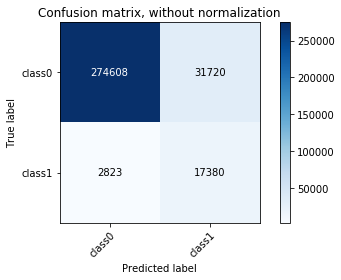

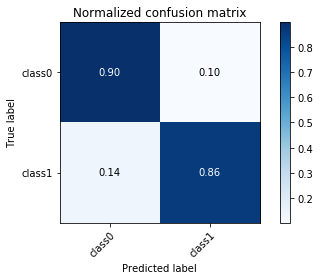


Wed, 16 October 2019 05:39:04


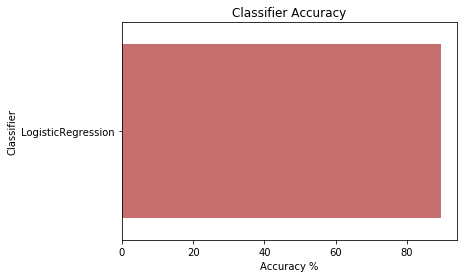

time: 33 s


In [0]:



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve,precision_recall_fscore_support


from sklearn.utils.multiclass import unique_labels

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression




EST = timezone('US/Eastern')




result_cols = ["Classifier", "Accuracy"]
result_frame = pd.DataFrame(columns=result_cols)

# Any results you write to the current directory are saved as output.

classifiers = [
   # KNeighborsClassifier(2), # okay performance, takes 90 mins
   # SVC(kernel="rbf", C=0.025, probability=True), #DJ asked to avoid unless needed, will try later, will may be try to tune.
    
   # RandomForestClassifier(), #performance not good.
   # GradientBoostingClassifier(), #performance not good
   # AdaBoostClassifier(), #DJ asked not to use
    #MultinomialNB() #performance not good.
   # XGBClassifier(), #performance not good.
    #LGBMClassifier(), #performance not good.
   # CatBoostClassifier() # crashing
    #DecisionTreeClassifier(),# best so far excluding logistic regression ( balanced weights) but .40 is the accuracy on the second label.
    #LogisticRegression(),
    LogisticRegression(class_weight='balanced')
]



  

  
  
for clf in classifiers:
    
    
    
     
    name = clf.__class__.__name__
    print(name)
    text_clf = Pipeline([('vect', TfidfVectorizer(min_df=1,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1,1))),('clf', clf)])
    text_clf.fit(x_train, y_train)
    y_pred = text_clf.predict(x_test)
    classifier_reports(y_test, y_pred)
    
    acc = metrics.accuracy_score(y_test,y_pred)
    
    #print (' Accuracy = '+ str(round(acc*100))+' %')
    
   # prec_rec_fscore=metrics.precision_recall_fscore_support(y_test,y_pred,average='weighted')
    
   # print(' Precision =',round(prec_rec_fscore[0]*100),'%')
   # print(' Recall =',round(prec_rec_fscore[1]*100),'%')
   # print(' F Score =',round(prec_rec_fscore[2]*100),'%')
    
    
    
    print()
    EST_Time = datetime.now(EST)
    print(EST_Time.strftime("%a, %d %B %Y %H:%M:%S"))
    
   
    
    acc_field = pd.DataFrame([[name, np.round(acc*100,2)]], columns=result_cols)
    result_frame = result_frame.append(acc_field)  
    
    np.set_printoptions(precision=2)

    
    
    
    
    
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=result_frame, color="r")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()





---Weight of 1 for Insincere Question class---

              precision    recall  f1-score   support

      class0       0.96      0.99      0.97    306328
      class1       0.68      0.37      0.48     20203

    accuracy                           0.95    326531
   macro avg       0.82      0.68      0.73    326531
weighted avg       0.94      0.95      0.94    326531

Confusion matrix, without normalization
[[302720   3608]
 [ 12702   7501]]
Normalized confusion matrix
[[0.99 0.01]
 [0.63 0.37]]


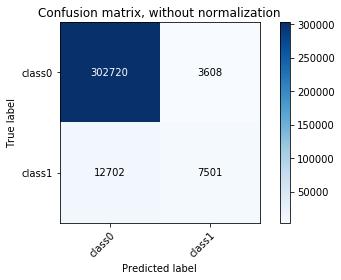

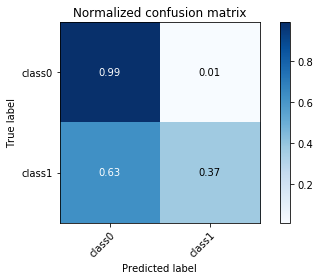

---Weight of 5 for Insincere Question class---

              precision    recall  f1-score   support

      class0       0.98      0.95      0.96    306328
      class1       0.48      0.72      0.58     20203

    accuracy                           0.93    326531
   macro avg       0.73      0.84      0.77    326531
weighted avg       0.95      0.93      0.94    326531

Confusion matrix, without normalization
[[290645  15683]
 [  5565  14638]]
Normalized confusion matrix
[[0.95 0.05]
 [0.28 0.72]]


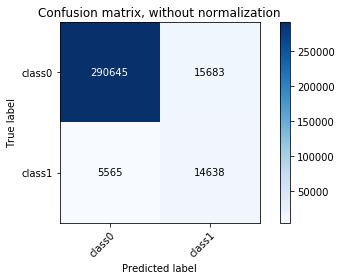

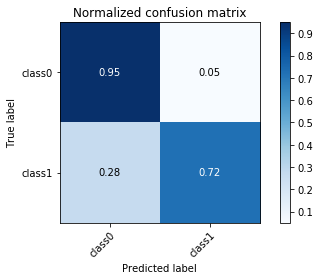

---Weight of 10 for Insincere Question class---

              precision    recall  f1-score   support

      class0       0.99      0.92      0.95    306328
      class1       0.40      0.82      0.54     20203

    accuracy                           0.91    326531
   macro avg       0.69      0.87      0.75    326531
weighted avg       0.95      0.91      0.93    326531

Confusion matrix, without normalization
[[281751  24577]
 [  3721  16482]]
Normalized confusion matrix
[[0.92 0.08]
 [0.18 0.82]]


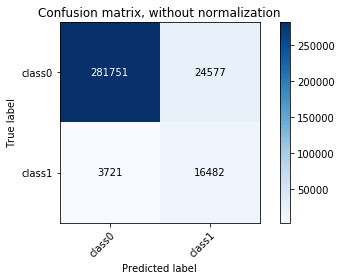

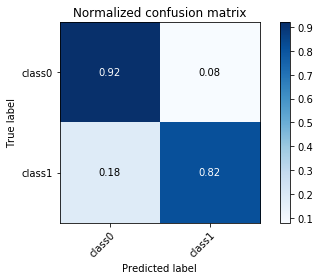

---Weight of 100 for Insincere Question class---

              precision    recall  f1-score   support

      class0       0.99      0.78      0.87    306328
      class1       0.22      0.94      0.35     20203

    accuracy                           0.79    326531
   macro avg       0.61      0.86      0.61    326531
weighted avg       0.95      0.79      0.84    326531

Confusion matrix, without normalization
[[238578  67750]
 [  1257  18946]]
Normalized confusion matrix
[[0.78 0.22]
 [0.06 0.94]]


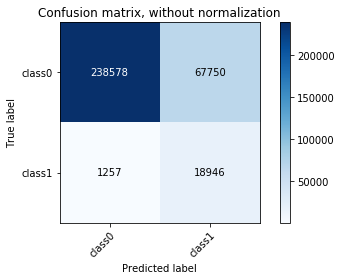

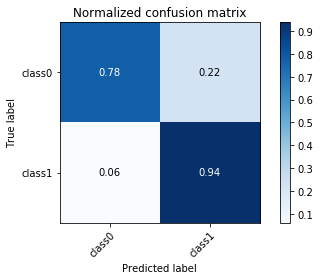

---Weight of 500 for Insincere Question class---

              precision    recall  f1-score   support

      class0       1.00      0.67      0.80    306328
      class1       0.16      0.96      0.28     20203

    accuracy                           0.69    326531
   macro avg       0.58      0.82      0.54    326531
weighted avg       0.94      0.69      0.77    326531

Confusion matrix, without normalization
[[206511  99817]
 [   760  19443]]
Normalized confusion matrix
[[0.67 0.33]
 [0.04 0.96]]


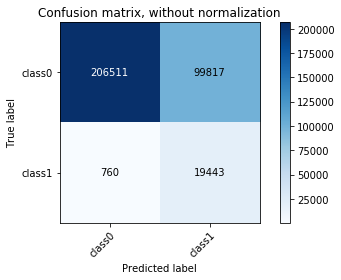

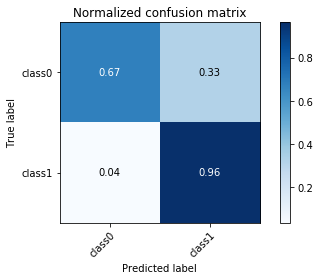

---Weight of 1000 for Insincere Question class---

              precision    recall  f1-score   support

      class0       1.00      0.64      0.78    306328
      class1       0.15      0.97      0.26     20203

    accuracy                           0.66    326531
   macro avg       0.57      0.80      0.52    326531
weighted avg       0.94      0.66      0.74    326531

Confusion matrix, without normalization
[[194678 111650]
 [   649  19554]]
Normalized confusion matrix
[[0.64 0.36]
 [0.03 0.97]]


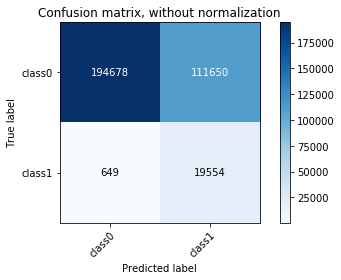

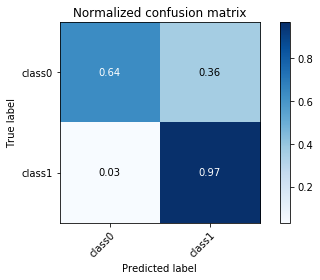

time: 2min 57s


In [0]:



for w in [1,5,10,100,500,1000]:
    print('---Weight of {} for Insincere Question class---'.format(w))
    text_clf = Pipeline([('vect', TfidfVectorizer(min_df=1,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1,1))),('clf', LogisticRegression(class_weight={0:1,1:w}))])
    text_clf.fit(x_train, y_train)
    y_pred = text_clf.predict(x_test)
    classifier_reports(y_test, y_pred)
  



    

#Observations of playing with different weights assigned to the Minority Class
As seen above, by playing with different weights, we can increase the recall for insincere label at the expense of recall for sincere label. If this would have been a business setting, business would have defined the thresholds or given a clear direction on whether they want a higher recall for minority label ( for eg. credit card fraud ) at the expense of misclassifying genuine transactions and annoying its customers or vice versa.
In our case, I guess Quora would want to classify a question as insincere more accurately and would be fine with incorrectly flagging a sincere question as insincere within certain limits of the misclassification. Quora, ofcourse wouldn't certainly want the users who ask questions get annoyed by getting their question(s) flagged as insincere and perhaps taken down from the Quora platform which has the potential to make people refrain from asking questions in long term. This certainly wouldn't be in the best interests of Quora as the entire platform is build on users asking questions and getting answers from fellow users.

It is evident from the above experiements that setting the class_weight param to balanced gives the best result.

In [0]:

#df=pd.read_csv('train.csv',nrows=900000)
df=pd.read_csv('train.csv')
#df=pd.read_csv('quora_preprocessed.csv')

pd.options.display.max_colwidth = 500
print('Number rows and columns:',df.shape)

df=stem_them(df) # no stemming needed again if you are using preprocessed data ; if you need to stem, it will take 9 mins.

x_train,x_test,y_train,y_test=split_train_test(df)



df.head()

Number rows and columns: (1306122, 3)


,qid,question_text,target,word_tokens_stemmed
0,00002165364db923c7e6,How did Quebec nationalists see their province as a nation in the 1960s?,0,quebec nationalist see provinc nation 1960
1,000032939017120e6e44,"Do you have an adopted dog, how would you encourage people to adopt and not shop?",0,adopt dog would encourag peopl adopt not shop
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity affect space geometry?,0,veloc affect time veloc affect space geometri
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg hemispheres?,0,otto von guerick use magdeburg hemispher
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain bike by just changing the tyres?,0,convert montra helicon mountain bike chang tyre


time: 9min 13s


#Perform GridSearch to find the best hyper parameters of Logistic Regression

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 36.6min finished



 Best score and parameter combination = 
0.9452022930956123 

{'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__random_state': 42, 'classifier__solver': 'liblinear'}
grid score: 0.9449501333629444
roc_auc_score 0.8783595700578357

              precision    recall  f1-score   support

      class0       0.99      0.90      0.94    306328
      class1       0.35      0.86      0.50     20203

    accuracy                           0.89    326531
   macro avg       0.67      0.88      0.72    326531
weighted avg       0.95      0.89      0.91    326531

Confusion matrix, without normalization
[[274608  31720]
 [  2823  17380]]
Normalized confusion matrix
[[0.89645086 0.10354914]
 [0.13973172 0.86026828]]


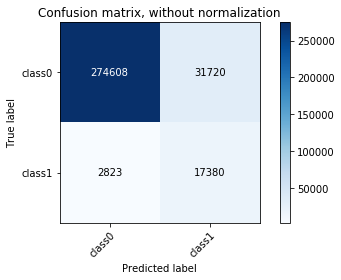

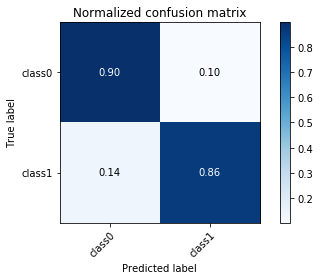

time: 37min 14s


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,precision_recall_curve,precision_recall_fscore_support


from sklearn.utils.multiclass import unique_labels

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression


pipe = Pipeline([('vect', TfidfVectorizer(min_df=1,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1,1))),('classifier' , LogisticRegression())])
#pipe = Pipeline([('classifier', DecisionTree())])

# Create param grid.


param_grid = [
    {#'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__solver' : ['liblinear'],
     'classifier__class_weight' : ['balanced'],
     'classifier__random_state' : [42]
    }]
# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid,scoring='roc_auc', cv = 5, verbose=1, n_jobs=-1)

# Fit on data

best_clf = clf.fit(x_train, y_train)

print('\n Best score and parameter combination = ')

print(best_clf.best_score_,'\n')    
print(best_clf.best_params_)    

y_pred = best_clf.predict(x_test)
print( 'grid score:',best_clf.score(x_test, y_test))
print('roc_auc_score',roc_auc_score(y_test, y_pred))
classifier_reports(y_test, y_pred)




# Code below uses the best hyperparams found by grid search above.
Best combination after gridsearch

{'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__random_state': 42, 'classifier__solver': 'liblinear'}

LogisticRegression

              precision    recall  f1-score   support

      class0       0.99      0.90      0.94    306328
      class1       0.35      0.86      0.50     20203

    accuracy                           0.89    326531
   macro avg       0.67      0.88      0.72    326531
weighted avg       0.95      0.89      0.91    326531

Confusion matrix, without normalization
[[274608  31720]
 [  2823  17380]]
Normalized confusion matrix
[[0.9  0.1 ]
 [0.14 0.86]]


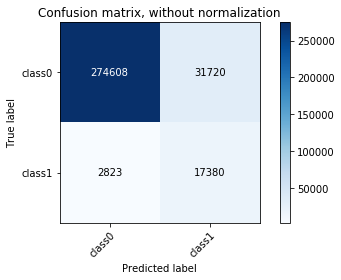

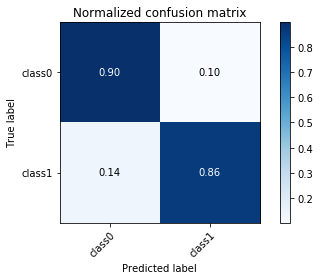


Wed, 16 October 2019 05:51:54


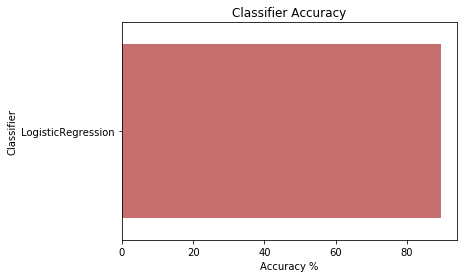

time: 32.9 s


In [0]:


classifiers = [
    LogisticRegression(class_weight='balanced',C=1,penalty='l2',random_state=42,solver='liblinear')
]

  
for clf in classifiers:
    
    
    
     
    name = clf.__class__.__name__
    print(name)
    text_clf = Pipeline([('vect', TfidfVectorizer(min_df=1,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1,1))),('clf', clf)])
    text_clf.fit(x_train, y_train)
    y_pred = text_clf.predict(x_test)
    classifier_reports(y_test, y_pred)
    
    acc = metrics.accuracy_score(y_test,y_pred)
    
     
    
    print()
    EST_Time = datetime.now(EST)
    print(EST_Time.strftime("%a, %d %B %Y %H:%M:%S"))
    
   
    
    acc_field = pd.DataFrame([[name, np.round(acc*100,2)]], columns=result_cols)
    result_frame = result_frame.append(acc_field)  
    
    np.set_printoptions(precision=2)

    
    
    
    
    
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=result_frame, color="r")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()



*Code below uses predict probabilities function and uses different thresholds for classification instead of the default 0.5 using the hyperparams found using gridsearch on logistic regression*

Which threshold to choose? It depends on what matters to you more - classifying positive labels accurately or classifying negative labels accurately

LogisticRegression

******** For i = 0.2 ******

              precision    recall  f1-score   support

      class0       1.00      0.76      0.86    306328
      class1       0.21      0.95      0.34     20203

    accuracy                           0.77    326531
   macro avg       0.60      0.86      0.60    326531
weighted avg       0.95      0.77      0.83    326531

Confusion matrix, without normalization
[[232248  74080]
 [   929  19274]]
Normalized confusion matrix
[[0.75816772 0.24183228]
 [0.04598327 0.95401673]]


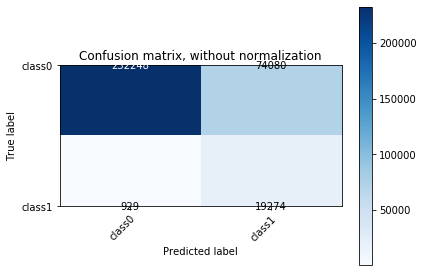

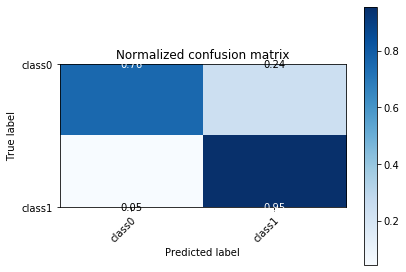


******** For i = 0.25 ******

              precision    recall  f1-score   support

      class0       1.00      0.80      0.88    306328
      class1       0.23      0.94      0.37     20203

    accuracy                           0.80    326531
   macro avg       0.61      0.87      0.63    326531
weighted avg       0.95      0.80      0.85    326531

Confusion matrix, without normalization
[[243809  62519]
 [  1223  18980]]
Normalized confusion matrix
[[0.79590831 0.20409169]
 [0.06053556 0.93946444]]


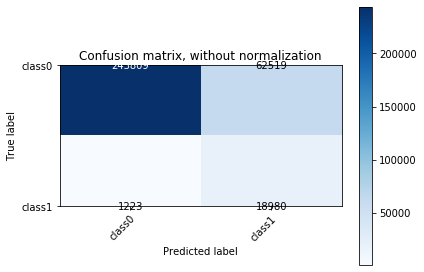

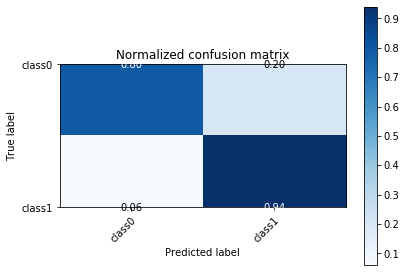


******** For i = 0.3 ******

              precision    recall  f1-score   support

      class0       0.99      0.83      0.90    306328
      class1       0.26      0.92      0.40     20203

    accuracy                           0.83    326531
   macro avg       0.63      0.87      0.65    326531
weighted avg       0.95      0.83      0.87    326531

Confusion matrix, without normalization
[[252739  53589]
 [  1532  18671]]
Normalized confusion matrix
[[0.82506007 0.17493993]
 [0.07583032 0.92416968]]


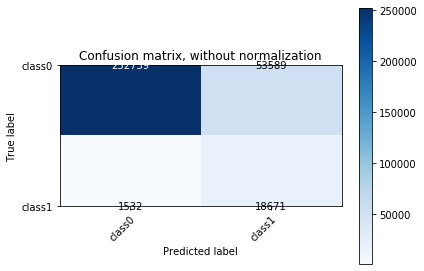

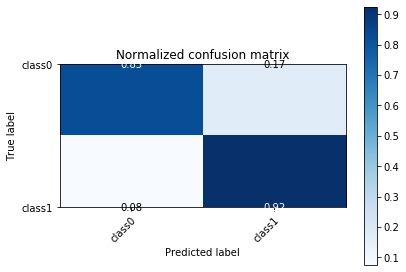


******** For i = 0.35 ******

              precision    recall  f1-score   support

      class0       0.99      0.85      0.91    306328
      class1       0.28      0.91      0.43     20203

    accuracy                           0.85    326531
   macro avg       0.64      0.88      0.67    326531
weighted avg       0.95      0.85      0.88    326531

Confusion matrix, without normalization
[[259648  46680]
 [  1830  18373]]
Normalized confusion matrix
[[0.84761432 0.15238568]
 [0.09058061 0.90941939]]


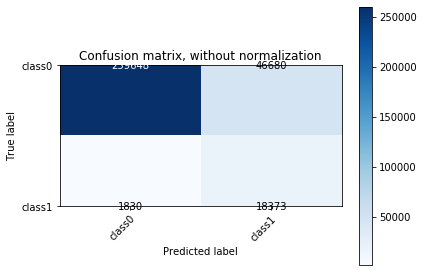

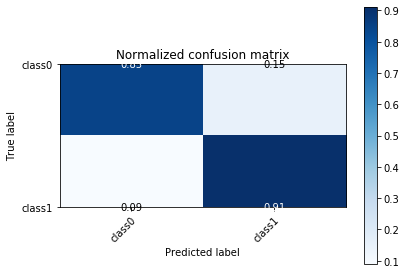


******** For i = 0.4 ******

              precision    recall  f1-score   support

      class0       0.99      0.87      0.92    306328
      class1       0.31      0.89      0.46     20203

    accuracy                           0.87    326531
   macro avg       0.65      0.88      0.69    326531
weighted avg       0.95      0.87      0.90    326531

Confusion matrix, without normalization
[[265399  40929]
 [  2148  18055]]
Normalized confusion matrix
[[0.86638832 0.13361168]
 [0.10632084 0.89367916]]


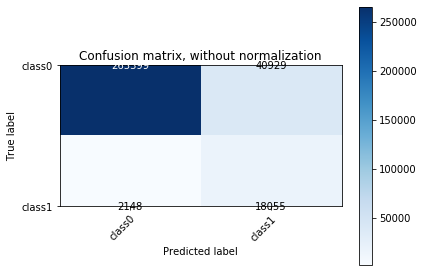

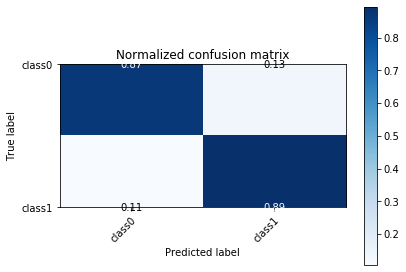


******** For i = 0.45 ******

              precision    recall  f1-score   support

      class0       0.99      0.88      0.93    306328
      class1       0.33      0.88      0.48     20203

    accuracy                           0.88    326531
   macro avg       0.66      0.88      0.71    326531
weighted avg       0.95      0.88      0.91    326531

Confusion matrix, without normalization
[[270194  36134]
 [  2463  17740]]
Normalized confusion matrix
[[0.88204147 0.11795853]
 [0.12191259 0.87808741]]


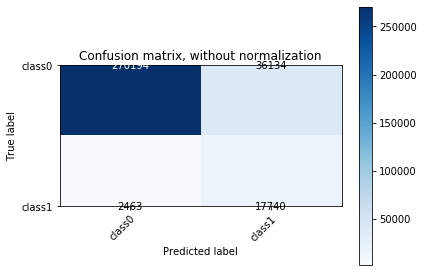

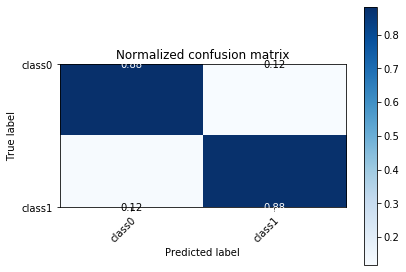

time: 43.6 s


In [9]:

clf = LogisticRegression(class_weight='balanced',C=1,penalty='l2',random_state=42,solver='liblinear')
     
name = clf.__class__.__name__
print(name)
text_clf = Pipeline([('vect', TfidfVectorizer(min_df=1,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1,1))),('clf', clf)])
text_clf.fit(x_train, y_train)
#y_pred = text_clf.predict(x_test)

pred_proba_df = pd.DataFrame(text_clf.predict_proba(x_test))
threshold_list = [0.2,0.25,0.3,0.35,0.4,0.45]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    classifier_reports(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_pred.iloc[:,1].as_matrix().reshape(y_pred.iloc[:,1].as_matrix().size,1))   
    acc = metrics.accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_pred.iloc[:,1].as_matrix().reshape(y_pred.iloc[:,1].as_matrix().size,1))
    
   
    
  
plt.show()





**Observations of playing with threshold level**

For threshold level = 0.5 (generic threshold) 

              precision    recall  f1-score   support

      class0       0.99      0.90      0.94    306328
      class1       0.35      0.86      0.50     20203

    accuracy                           0.89    326531


For Threshold level = 0.4 

              precision    recall  f1-score   support

      class0       0.99      0.87      0.92    306328
      class1       0.31      0.89      0.46     20203

    accuracy                           0.87    326531



As we can see above, by lowering threshod to 0.4 from 0.5, we are able to 
increase recall for class 1 but at the expense of its precision. 

Precision = TP/ ( TP + FP) = % of relevant predictions. 
Recall = TP/ TP(TP+FN) % of correct predictions

Eg, in case of amazon search, if users find many false positives which means irrelevant results, they may move to another platform. So, you have to have balance between precision and recall.
You can increase one at the expense of other. So, it depends on your business to take a decision on the recall-precision trade off.
F1 includes both precision and recall and is their harmonic mean. Depending on your business use case, you may want to just maximise F1 score.

In our case of classifying sincere vs insincere, I Think quora would be okay with some false positives at the expense of better prediction of insincere questions.

# Random Forest Classifier with class weight balanced in the code below -

RandomForestClassifier


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



              precision    recall  f1-score   support

      class0       0.95      0.99      0.97    306328
      class1       0.50      0.18      0.27     20203

    accuracy                           0.94    326531
   macro avg       0.73      0.58      0.62    326531
weighted avg       0.92      0.94      0.92    326531

Confusion matrix, without normalization
[[302684   3644]
 [ 16531   3672]]
Normalized confusion matrix
[[0.98810425 0.01189575]
 [0.81824482 0.18175518]]


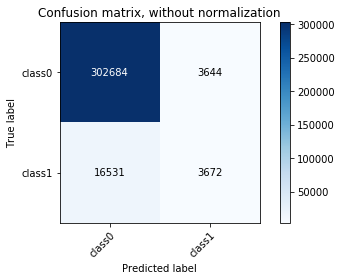

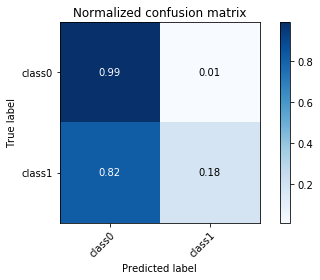


Thu, 12 September 2019 12:27:21


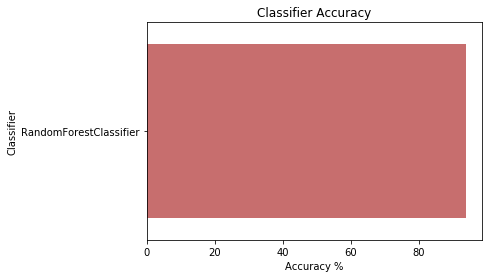

time: 12min 1s


In [0]:



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve,precision_recall_fscore_support


from sklearn.utils.multiclass import unique_labels

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression




EST = timezone('US/Eastern')




result_cols = ["Classifier", "Accuracy"]
result_frame = pd.DataFrame(columns=result_cols)

# Any results you write to the current directory are saved as output.

classifiers = [
   # KNeighborsClassifier(2), # okay performance, takes 90 mins
   # SVC(kernel="rbf", C=0.025, probability=True), #DJ asked to avoid unless needed, will try later, will may be try to tune.
    
    RandomForestClassifier(class_weight='balanced'), #performance not good.
   # GradientBoostingClassifier(), #performance not good
   # AdaBoostClassifier(), #DJ asked not to use
    #MultinomialNB() #performance not good.
   # XGBClassifier(), #performance not good.
    #LGBMClassifier(), #performance not good.
   # CatBoostClassifier() # crashing
   # DecisionTreeClassifier(class_weight='balanced'),# best so far excluding logistic regression ( balanced weights) but .40 is the accuracy on the second label.
    #LogisticRegression(),
   # LogisticRegression(class_weight='balanced')
]



  

  
  
for clf in classifiers:
    
    
    
     
    name = clf.__class__.__name__
    print(name)
    text_clf = Pipeline([('vect', TfidfVectorizer(min_df=1,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1,1))),('clf', clf)])
    text_clf.fit(x_train, y_train)
    y_pred = text_clf.predict(x_test)
    classifier_reports(y_test, y_pred)
    
    acc = metrics.accuracy_score(y_test,y_pred)
    
    #print (' Accuracy = '+ str(round(acc*100))+' %')
    
   # prec_rec_fscore=metrics.precision_recall_fscore_support(y_test,y_pred,average='weighted')
    
   # print(' Precision =',round(prec_rec_fscore[0]*100),'%')
   # print(' Recall =',round(prec_rec_fscore[1]*100),'%')
   # print(' F Score =',round(prec_rec_fscore[2]*100),'%')
    
    
    
    print()
    EST_Time = datetime.now(EST)
    print(EST_Time.strftime("%a, %d %B %Y %H:%M:%S"))
    
   
    
    acc_field = pd.DataFrame([[name, np.round(acc*100,2)]], columns=result_cols)
    result_frame = result_frame.append(acc_field)  
    
    np.set_printoptions(precision=2)

    
    
    
    
    
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=result_frame, color="r")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()





# Random Forest Classifier with Grid Search in the code below - 

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,precision_recall_curve,precision_recall_fscore_support


from sklearn.utils.multiclass import unique_labels

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression


pipe = Pipeline([('vect', TfidfVectorizer(min_df=1,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1,1))),
                 ('classifier' , RandomForestClassifier(random_state=42,class_weight='balanced'))])
#pipe = Pipeline([('classifier', DecisionTree())])

# Create param grid.


param_grid = [{'classifier' : [RandomForestClassifier(random_state=42,class_weight='balanced')],
    }
   ]
# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid,scoring='roc_auc', cv = 3, verbose=1, n_jobs=-1)

# Fit on data

best_clf = clf.fit(x_train, y_train)

print('\n Best score and parameter combination = ')

print(best_clf.best_score_,'\n')    
print(best_clf.best_params_)    

y_pred = best_clf.predict(x_test)
print( 'grid score:',best_clf.score(x_test, y_test))

classifier_reports(y_test, y_pred)




Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  9.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Grid Search with Decision Tree Classifier below

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 126.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 160.6min finished



 Best score and parameter combination = 
0.8127726793310983 

{'classifier__max_depth': 69, 'classifier__min_samples_split': 550}
grid score: 0.8142958241528877

              precision    recall  f1-score   support

      class0       0.98      0.90      0.94    306328
      class1       0.31      0.70      0.43     20203

    accuracy                           0.89    326531
   macro avg       0.65      0.80      0.68    326531
weighted avg       0.94      0.89      0.91    326531

Confusion matrix, without normalization
[[274868  31460]
 [  5970  14233]]
Normalized confusion matrix
[[0.9 0.1]
 [0.3 0.7]]


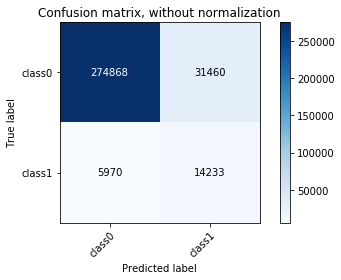

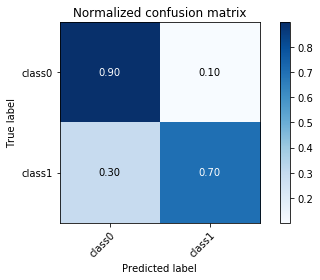

time: 2h 43min 47s


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,precision_recall_curve,precision_recall_fscore_support


from sklearn.utils.multiclass import unique_labels

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression


pipe = Pipeline([('vect', TfidfVectorizer(min_df=1,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1,1))),
                 ('classifier' , DecisionTreeClassifier(random_state=42,class_weight='balanced'))])
#pipe = Pipeline([('classifier', DecisionTree())])

# Create param grid.
'''
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__solver' : ['liblinear'],
     'classifier__class_weight' : ['balanced'],
     'classifier__random_state' : [42]
    },
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]
'''

param_grid = [
    {'classifier__min_samples_split' : range(400,600,50),'classifier__max_depth': range(50,70)}]
# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid,scoring='roc_auc', cv = 3, verbose=1, n_jobs=-1)

# Fit on data

best_clf = clf.fit(x_train, y_train)

print('\n Best score and parameter combination = ')

print(best_clf.best_score_,'\n')    
print(best_clf.best_params_)    

y_pred = best_clf.predict(x_test)
print( 'grid score:',best_clf.score(x_test, y_test))

classifier_reports(y_test, y_pred)




As seen above, Random forest even with class weight set to balanced did not fare well. Decision tree with class weight set to balanced did do better than it's bare version however it isn't considerably better than Logistic Regression with class weight hyperparameter.

There were other algorihtms tried as well and Logistic Regression with the class weight hyper parameter emerged as the clear winner.

